# Bootstrapping

Lucas De Oliveira, Kooha Kwon, Melvin Vellera

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import t
import random
import matplotlib.pyplot as plt

## Quick Recap

Bootstrapping is a technique of **iterative resampling with replacement** to make inferences about the general population without conducting more experiments.

Say we ran an experiments with the following experimental results:

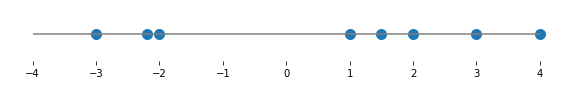

In [3]:
# Experimental sample
exp_sample = [-3, -2.2, -2, 1, 1.5, 2, 3, 4]

# Plot
fig, ax = plt.subplots(figsize = (10, 1))
ax.hlines(y = 0.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(exp_sample, [0]*len(exp_sample), s = 100)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Let's see what bootstrapped samples look like (re-run code cell to see variability of samples)...

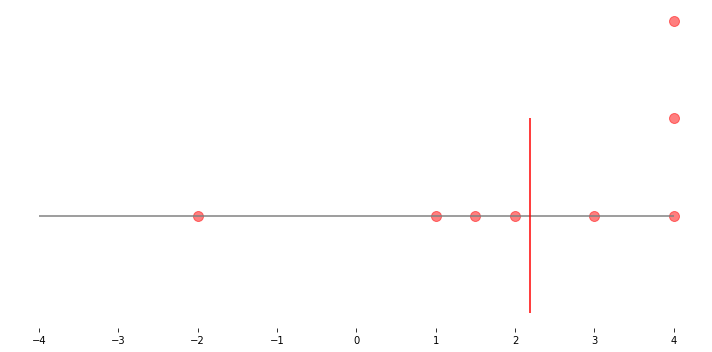

In [4]:
# Get two bootstrapped samples
inds = np.random.randint(0,8,8)
strap = [exp_sample[j] for j in inds]
val_count = Counter(strap)

bootstrap = []
counts = []
for val, count in val_count.items():
    k = 1
    while k <= count:
        bootstrap.append(val)
        counts.append(k)
        k += 1       


# Plot
fig, ax = plt.subplots(figsize = (10, 5))

ax.hlines(y = 1.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(bootstrap, counts, s = 100, color = 'red', alpha = .5)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.vlines(x = np.mean(bootstrap), ymin = 0.0, ymax = 2.0, color = 'red')

plt.tight_layout()
plt.show()

Finally, we can analyze the summary statistic(s) for our bootstrapped samples:

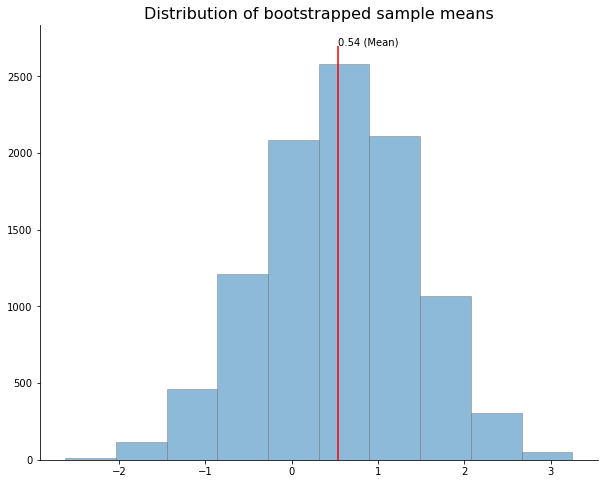

In [5]:
# Bootstrap 10,000 samples
means = []

for i in range(10_000):
    inds = np.random.randint(0,8,8)
    strap = [exp_sample[j] for j in inds]
    means.append(np.mean(strap))

# Plot
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(means, alpha = .5, edgecolor = 'grey')
ax.vlines(x = np.mean(means), ymin = 0, ymax = 2700, color = 'red')
ax.annotate(f'{np.mean(means):.2f} (Mean)', (np.mean(means), 2700))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Distribution of bootstrapped sample means', size = 16)

plt.show()

## Real Data Example: Body Fat Percentage


In [6]:
# Load data
bfp = pd.read_csv('BodyFatPercentage.csv')
bfp.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Let's Take A Look Into Population Data

In [7]:
bf_mean = bfp['BODYFAT'].mean()
pop_n = len(bfp)
print(f'Population Size: {pop_n}')

Population Size: 252


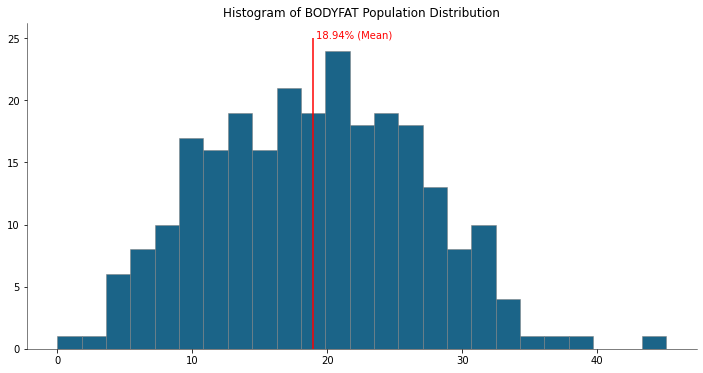

In [8]:
# Population Histogram 
fig, ax = plt.subplots(figsize = (12,6))

n, bins, patches= ax.hist(bfp['BODYFAT'], bins = 25, color='#1B6488')
for rect in patches:
    rect.set_linewidth(.5)
    rect.set_edgecolor('grey')
    
ax.set_title('Histogram of BODYFAT Population Distribution')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)

ax.vlines(x = bf_mean , ymin = 0, ymax = 25, color = 'red')
ax.annotate(f'{bf_mean:.2f}% (Mean)', (bf_mean+0.2, 25),color='r')

plt.show()

### Now, lets say that we surveyed 10 peoeple and we had to draw conclusions about the population distribution


In [14]:
# Randomly Pull 10 Rows Using Random.Sample
n = 10
sample_bfp = bfp.loc[random.sample(range(252), 10)]
sample_bfp['BODYFAT']

129    15.0
179    16.8
59     24.0
89     14.3
132    23.1
145    14.4
103    21.9
197    17.6
240    17.0
32     13.4
Name: BODYFAT, dtype: float64

### Traditional Statistical CI

In [15]:
s = np.std(sample_bfp['BODYFAT'], ddof = 1)
sample_mean = sample_bfp['BODYFAT'].mean()
t_stat = t.ppf(1 - 0.05/2, n-1)
standard_error =(s / np.sqrt(n))

stat_ci = [sample_mean - t_stat * standard_error, sample_mean + t_stat * standard_error]

print(f'''Population Mean: {bf_mean:.2f}\nSample Mean: {sample_mean:.2f}\nStatistical Confidence Interval: {[f'{e:.2f}' for e in stat_ci]}\nInterval Range: {stat_ci[1] - stat_ci[0]:.2f}''')

Population Mean: 18.94
Sample Mean: 17.75
Statistical Confidence Interval: ['14.97', '20.53']
Interval Range: 5.56


### Bootstrapping Statistical CI

1. Resample the sample with replacement
2. Calculate and collect the resample mean
3. Repreat Steps 1 - 3
4. Build Histogram
5. Build CI using the Histogram

In [16]:
resample_means = []

for i in range(10_000):
    inds = np.random.randint(0, n-1, n-1) # Step 1: Randomly Resampling with Replacement
    mean = sample_bfp['BODYFAT'].iloc[inds].mean() # Step 2: Calculate the Resample Mean
    resample_means.append(mean) # Collect the Resample Mean
#Step 3: Repeat 10,000 times

boot_mean = np.mean(resample_means)
boot_ci = [np.quantile(resample_means, 0.025), np.quantile(resample_means, 0.975)]


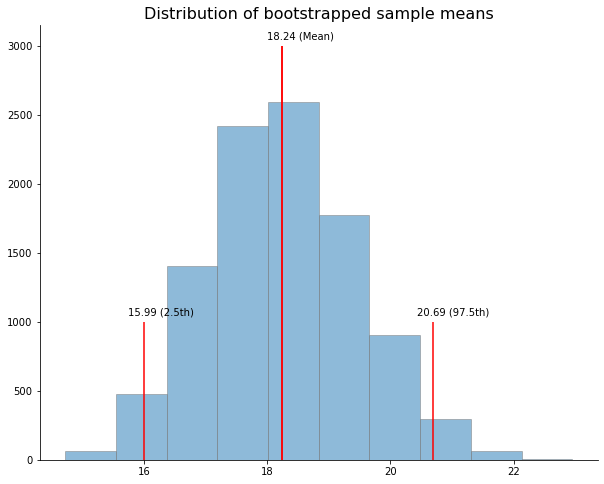

In [17]:
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(resample_means, alpha = .5, edgecolor = 'grey')
ax.vlines(x = boot_mean, ymin = 0, ymax = 3000, color = 'red')
ax.vlines(x = boot_ci[0], ymin = 0, ymax = 1000, color = 'red')
ax.vlines(x = boot_ci[1], ymin = 0, ymax = 1000, color = 'red')
ax.vlines(x = boot_mean, ymin = 0, ymax = 3000, color = 'red')

ax.annotate(f'{boot_mean:.2f} (Mean)', (boot_mean-0.25, 3050))
ax.annotate(f'{boot_ci[0]:.2f} (2.5th)', (boot_ci[0]-0.25, 1050))
ax.annotate(f'{boot_ci[1]:.2f} (97.5th)', (boot_ci[1]-0.25, 1050))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Distribution of bootstrapped sample means', size = 16)

plt.show()

In [18]:
print(f'''Statistical Confidence Interval: {[f'{e:.2f}' for e in stat_ci]}\nTradtional Interval Range: {stat_ci[1]-stat_ci[0]:.2f}''')
print('')
print(f'''Bootstrap Confidence Interval: {[f'{e:.2f}' for e in boot_ci]}\nBootstrap Interval Range: {boot_ci[1]-boot_ci[0]:.2f}''')

Statistical Confidence Interval: ['14.97', '20.53']
Tradtional Interval Range: 5.56

Bootstrap Confidence Interval: ['15.99', '20.69']
Bootstrap Interval Range: 4.70


#### Example with Rsquared, a statistic that might not have a well known statistical calculation 

In [170]:
# Bootstrapping for Rsquared
import statsmodels.formula.api as smf
model = smf.ols('BODYFAT ~ ABDOMEN + WRIST + ANKLE + AGE', data = bfp).fit()

# Model for a sample of the data
samp_n = 30
sample_bfp = bfp.loc[random.sample(range(pop_n), samp_n)]
sample_model = smf.ols('BODYFAT ~ ABDOMEN + WRIST + ANKLE + AGE', data = sample_bfp).fit()

print(f'Population Rsquared_adj: {model.rsquared_adj:.2f}\nSample Rsquared_adj: {sample_model.rsquared_adj:.2f}')

Population Rsquared_adj: 0.71
Sample Rsquared_adj: 0.65


In [171]:
adj_rsquareds = []

for i in range(1_000):
    inds = np.random.randint(0, samp_n-1, samp_n-1)
    model = smf.ols('BODYFAT ~ ABDOMEN + WRIST + ANKLE + AGE', data = sample_bfp.iloc[inds]).fit()
    rsq_adj = model.rsquared_adj
    adj_rsquareds.append(rsq_adj)
    
boot_rsq_adj_mean = np.mean(adj_rsquareds)
boot_rsq_adj_ci = [np.quantile(adj_rsquareds, 0.025), np.quantile(adj_rsquareds, 0.975)]
print(f'''Bootstrap Confidence Interval (Adjusted Rsquared): {[f'{e:.2f}' for e in boot_rsq_adj_ci]}''')

Bootstrap Confidence Interval (Adjusted Rsquared): ['0.46', '0.79']


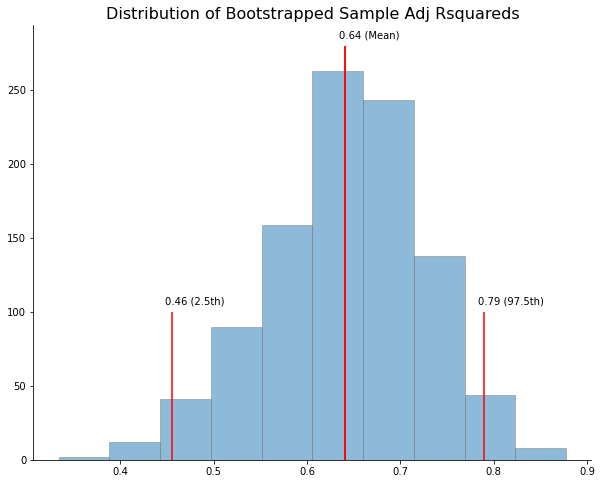

In [172]:
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(adj_rsquareds, alpha = .5, edgecolor = 'grey')
ax.vlines(x = boot_rsq_adj_mean, ymin = 0, ymax = 280, color = 'red')
ax.vlines(x = boot_rsq_adj_ci[0], ymin = 0, ymax = 100, color = 'red')
ax.vlines(x = boot_rsq_adj_ci[1], ymin = 0, ymax = 100, color = 'red')
ax.vlines(x = boot_rsq_adj_mean, ymin = 0, ymax = 280, color = 'red')

ax.annotate(f'{boot_rsq_adj_mean:.2f} (Mean)', (boot_rsq_adj_mean-0.007, 285))
ax.annotate(f'{boot_rsq_adj_ci[0]:.2f} (2.5th)', (boot_rsq_adj_ci[0]-0.007, 105))
ax.annotate(f'{boot_rsq_adj_ci[1]:.2f} (97.5th)', (boot_rsq_adj_ci[1]-0.007, 105))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Distribution of Bootstrapped Sample Adj Rsquareds', size = 16)

plt.show()